<font size="4"><b>But</b></font>

Prediction du variable hospdeath si le patient a survie dans l'hopitale ou non.<br><br>

<font size="4"><b>Objectifs</b></font>

- Analyse des donnees 
- Preparation des donnees pour l'apprentissage
- Creation d'un modele de Regression Logistique
- Evaluation du modele creer
- Ajustement du modele
- Prediction du variable hospdeath

<font size="4"><b>Selection de quelques colonnes:</b></font>
- L'age du patient peut etre un facteur important dans la prediction du deces.
- Cateristiques socio-economique(sexe,race)
- Scores psychologiques(scoma,sps,aps) peuvent refléter la gravité de l'état de santé du patient.
- Mesures physiologiques(meansbp,hrt,resp,temp) peuvent être liées à la condition du patient.
- Mesures socio-économiques(edu,income) peuvent influencer les soins médicaux accessibles.
- Catégorie de maladie(dzgroup,dzclass,num.co), nombre de maladies simultanées(num.co), présence de cancer(ca), qui sont des informations médicales pertinentes.
- Estimations du survie(d.time,surv2m,surv6m) peuvent être importantes dans le contexte de prédire le décès à l'hôpital.
- Mesures de laboratoire(alb,bili,crea,sod,ph,glucose,bun,urine) peuvent fournir des informations sur la sante du patient.
- Indices d’activités quotidienne(adlp,adls,sfdm2) peuvent donner des informations sur le niveau d’indépendance fonctionnelle du patient, et aussi niveau d’incapacité du patient.



<font size="4"><b>Etapes</b></font>
1) Importation de la base de donnee
2) Exploitation et visualisation des donnees
3) Pre-Traitemnet
4) Modeles:<br>
4.1) Modele Regression Logistique<br> 
4.2) Modele KNN<br>
4.3) Modele SVM

## 1) Importation de la base de donnees

#### Importation des bibliotheques

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report



In [4]:
import warnings
warnings.filterwarnings("ignore")

#### Importation de la base de donnees

In [6]:
df = pd.read_csv("data.csv",delimiter=";")
data = df.copy()

In [6]:
data.head() #Visualiser les 5 premiers lignes 

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.0,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.0,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.0,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,...,7.509766,NaN,NaN,NaN,NaN,2.0,2.0,0,0,no(M2 and SIP pres)


In [6]:
data.tail() #Visualiser les 5 derniers lignes 

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
9100,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,0.0,52870.0,34329.3125,...,7.459961,188.0,21.0,NaN,NaN,0.0,0.000000,0,0,NaN
9101,55.15399,female,Coma,Coma,1,11.0,NaN,41.0,35377.0,23558.5000,...,7.289062,190.0,49.0,0.0,NaN,0.0,0.000000,0,0,NaN
9102,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,46564.0,31409.0156,...,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391,0,0,NaN
9103,47.01999,male,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,0.0,58439.0,NaN,...,7.469727,246.0,55.0,NaN,NaN,0.0,0.000000,1,1,<2 mo. follow-up
9104,81.53894,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,$11-$25k,0.0,15604.0,10605.7578,...,7.289062,187.0,15.0,NaN,0.0,NaN,0.494751,1,0,no(M2 and SIP pres)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

L'ensemble de données contient 9105 entrées avec 45 colonnes, comprenant diverses caractéristiques telles que l'âge, le sexe, le groupe de maladies, le niveau d'éducation, le revenu, les scores physiologiques et les résultats hospitaliers. Certaines colonnes comportent des valeurs manquantes et la variable ciblé est "hospdead", représentant les décès à l'hôpital.

In [9]:
data.describe()#statistiques

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead
count,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,...,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000,9105.000000,9105.000000
mean,62.650823,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,...,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272,0.681054,0.259198
std,15.593710,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,...,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763,0.466094,0.438219
min,18.041990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,...,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,...,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.856990,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,...,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,73.998960,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,...,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000,1.000000,1.000000
max,101.847960,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,...,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242,1.000000,1.000000


###  2) Exploration et visualisation des donnees

In [7]:
decus_hop = data[data['hospdead']==1]
decus_hop

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.000000,1,1,<2 mo. follow-up
5,93.01599,male,Coma,Coma,1,14.0,NaN,55.0,6884.0,NaN,...,7.659180,NaN,NaN,NaN,NaN,1.0,1.000000,1,1,<2 mo. follow-up
11,59.20099,male,Lung Cancer,Cancer,0,14.0,NaN,0.0,29388.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.000000,1,1,<2 mo. follow-up
17,63.66299,female,ARF/MOSF w/Sepsis,ARF/MOSF,0,22.0,$25-$50k,26.0,283303.0,156674.1250,...,7.449219,NaN,NaN,NaN,NaN,0.0,0.000000,1,1,<2 mo. follow-up
18,31.84399,male,Cirrhosis,COPD/CHF/Cirrhosis,2,16.0,under $11k,0.0,27985.0,17528.4375,...,NaN,NaN,NaN,NaN,7.0,7.0,7.000000,1,1,<2 mo. follow-up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,66.14600,male,MOSF w/Malig,ARF/MOSF,2,NaN,under $11k,37.0,53671.0,37465.8438,...,NaN,108.0,24.0,2700.0,NaN,NaN,2.387695,1,1,<2 mo. follow-up
9082,75.40594,male,Coma,Coma,2,NaN,NaN,89.0,32243.0,21154.6875,...,7.239258,147.0,18.0,1515.0,NaN,0.0,0.000000,1,1,<2 mo. follow-up
9083,85.66498,female,Coma,Coma,1,8.0,under $11k,100.0,3906.0,2507.3887,...,NaN,158.0,11.0,NaN,NaN,1.0,1.000000,1,1,<2 mo. follow-up
9093,69.64795,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,$25-$50k,44.0,44632.0,29434.5938,...,NaN,144.0,8.0,3320.0,NaN,3.0,3.000000,1,1,<2 mo. follow-up


In [11]:
no_decus_hop = data[data['hospdead']==0]
no_decus_hop

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.000000,0,0,NaN
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.000000,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,...,7.509766,NaN,NaN,NaN,NaN,2.0,2.000000,0,0,no(M2 and SIP pres)
6,62.37097,male,CHF,COPD/CHF/Cirrhosis,1,14.0,$25-$50k,0.0,30460.0,NaN,...,7.479492,NaN,NaN,NaN,0.0,1.0,1.000000,1,0,no(M2 and SIP pres)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,68.61597,female,COPD,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,2758.0,1847.3760,...,7.489258,142.0,17.0,950.0,0.0,NaN,0.494751,0,0,no(M2 and SIP pres)
9100,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,0.0,52870.0,34329.3125,...,7.459961,188.0,21.0,NaN,NaN,0.0,0.000000,0,0,NaN
9101,55.15399,female,Coma,Coma,1,11.0,NaN,41.0,35377.0,23558.5000,...,7.289062,190.0,49.0,0.0,NaN,0.0,0.000000,0,0,NaN
9102,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,46564.0,31409.0156,...,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391,0,0,NaN


In [12]:
print("Le nombre totale des personnes est:",len(data))
#Décus dans l'hopital
print("Le nombre de personnes qui n'ont pas été décus dans l'hopitale:",len(no_decus_hop))
print("Le pourcentage des personnes qui n'ont pas été décus dans l'hopitale est : ", len(no_decus_hop)/len(data) * 100 , '%' )

Le nombre totale des personnes est: 9105
Le nombre de personnes qui n'ont pas été décus dans l'hopitale: 6745
Le pourcentage des personnes qui n'ont pas été décus dans l'hopitale est :  74.08017572762219 %


In [13]:
#Non decus dans l'hopital
print("Le nombre de personnes qui ont été décus dans l'hopital:",len(decus_hop))
print("Le pourcentage des personnes qui ont été décus dans l'hopital est : ", len(decus_hop)/len(data) * 100 , '%' )

Le nombre de personnes qui ont été décus dans l'hopital: 2360
Le pourcentage des personnes qui ont été décus dans l'hopital est :  25.919824272377813 %


<Axes: xlabel='sex', ylabel='count'>

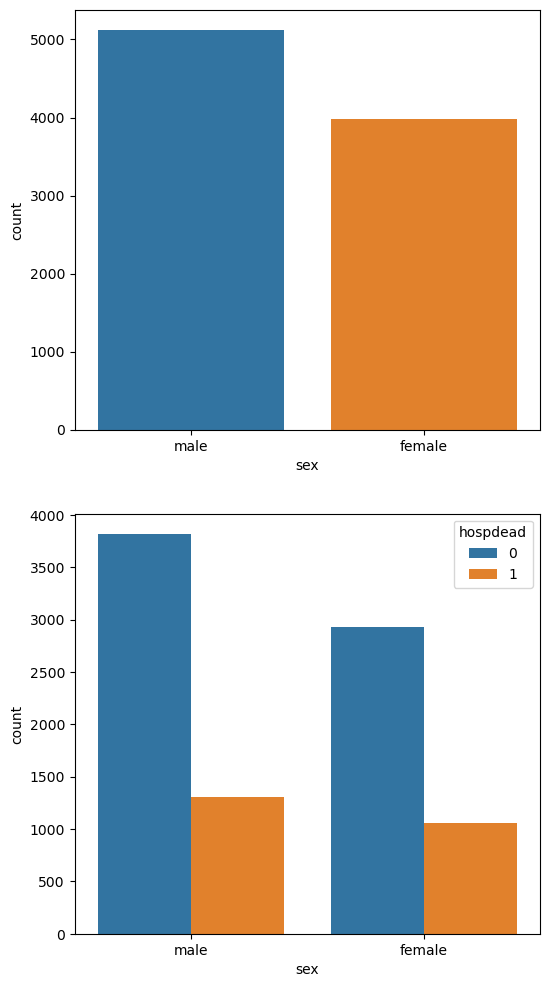

In [14]:
#Critere est sex
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot( x= data['sex'], data = data)
plt.subplot(212)
sns.countplot(x=data['sex'], hue = 'hospdead', data = data)


<font size="4"><b>Interpretation</b></font>

La majorite des hommes ont été décus dans l'hopital.

<Axes: xlabel='income', ylabel='count'>

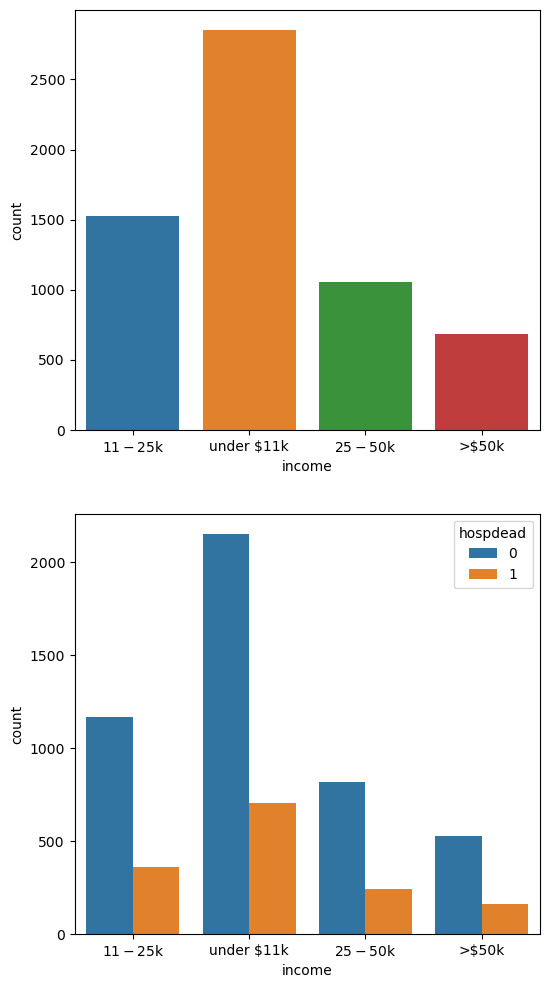

In [15]:
#Critere est sex
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot( x= data['income'], data = data)
plt.subplot(212)
sns.countplot(x=data['income'], hue = 'hospdead', data = data)


<font size="4"><b>Interpretation</b></font>

les personnes qui ont un revenue faible under $11k ont été décedées dans l'hopital.

### 3) Pretraitement des donnees

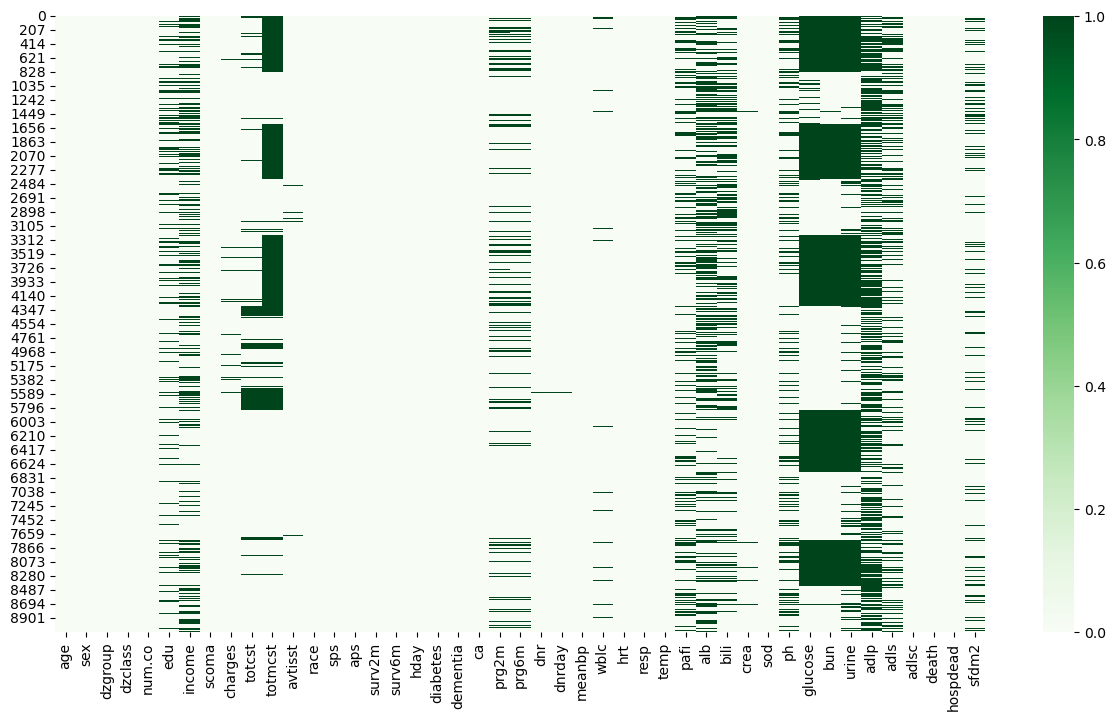

In [8]:
plt.figure(figsize =(15,8))
sns.heatmap(data.isnull(), cmap='Greens')
plt.show()

<font size="4"><b>Interpretation</b></font>

Dans les colonnes charges, totcst, totncst, glucose, bun, urine et adlp ont beaucoup de valeurs manquantes.<br>
Les autres colonnes ont quelques valeurs manquantes.


In [9]:
print("Valeurs manquantes:", data.isnull().sum().sum())
print("Duplicated values:", data.duplicated().sum())

Valeurs manquantes: 47110
Duplicated values: 0


<font size="4"><b>Interpretation</b></font>

- Il y'a 39021 valeurs null
- Aucun dupliquant n'est affiche

#### Nettoyage des donnes

In [10]:
data = data.dropna()
print("Nombre des valeurs manquantes:", data.isnull().sum().sum())

Nombre des valeurs manquantes: 0


In [11]:
#Convert object type to int
data['sex'].replace(['male','female'],[0,1],inplace=True)
data['dzgroup'].replace(['ARF/MOSF w/Sepsis','CHF','Cirrhosis','Colon Cancer','Lung Cancer','Coma','MOSF w/Malig','COPD'],[0,1,2,3,4,5,6,7],inplace=True)
data['dzclass'].replace(['ARF/MOSF','COPD/CHF/Cirrhosis','Cancer','Coma'],[0,1,2,3],inplace=True)
data['race'].replace(['asian', 'black', 'hispanic', 'missing', 'other', 'white'],[0,1,2,3,4,5],inplace=True)
data['income'].replace(['$11-$25k', '$25-$50k', '>$50k', 'under $11k'],[0,1,2,3,],inplace=True)
data['ca'].replace(['yes','no','metastatic'],[0,1,2],inplace=True)
data['dnr'].replace(['dnr after sadm','dnr before sadm','missing','no dnr'],[0,1,2,3],inplace=True)
data['sfdm2'].replace(['no(M2 and SIP pres)', 'adl>=4 (>=5 if sur)', 'SIP>=30', 'Coma or Intub', '<2 mo. follow-up'],[0,1,2,3,4],inplace=True)
print(data.dtypes)

age         float64
sex           int64
dzgroup       int64
dzclass       int64
num.co        int64
edu         float64
income        int64
scoma       float64
charges     float64
totcst      float64
totmcst     float64
avtisst     float64
race          int64
sps         float64
aps         float64
surv2m      float64
surv6m      float64
hday          int64
diabetes      int64
dementia      int64
ca            int64
prg2m       float64
prg6m       float64
dnr           int64
dnrday      float64
meanbp      float64
wblc        float64
hrt         float64
resp        float64
temp        float64
pafi        float64
alb         float64
bili        float64
crea        float64
sod         float64
ph          float64
glucose     float64
bun         float64
urine       float64
adlp        float64
adls        float64
adlsc       float64
death         int64
hospdead      int64
sfdm2         int64
dtype: object


In [12]:
data['age'].astype(int)

834     55
903     35
907     76
972     48
1171    41
        ..
9016    68
9055    74
9066    69
9081    54
9091    79
Name: age, Length: 306, dtype: int32

In [13]:
data

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
834,55.98599,0,1,1,3,18.0,2,0.0,90756.0,45550.0625,...,7.500000,141.0,31.0,1875.0,0.0,0.0,0.0,1,1,4
903,35.26599,0,0,0,0,12.0,0,0.0,48956.0,23854.9062,...,7.319336,110.0,4.0,2870.0,6.0,6.0,6.0,0,0,2
907,76.44098,0,0,0,2,12.0,1,0.0,23486.0,11454.5703,...,7.409180,189.0,69.0,2560.0,0.0,0.0,0.0,1,0,0
972,48.47098,1,4,2,1,17.0,3,0.0,41422.0,21064.2656,...,7.469727,184.0,9.0,2800.0,1.0,0.0,0.0,1,0,4
1171,41.42599,0,0,0,3,12.0,1,41.0,275961.0,39765.2500,...,7.479492,128.0,19.0,4210.0,2.0,2.0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,68.41095,0,5,3,1,14.0,1,26.0,50312.0,33776.4688,...,7.439453,141.0,12.0,2500.0,0.0,0.0,0.0,1,0,4
9055,74.05896,1,4,2,1,11.0,0,0.0,13262.0,8684.1641,...,7.429688,76.0,39.0,2625.0,5.0,7.0,7.0,1,0,1
9066,69.36597,0,0,0,0,12.0,1,0.0,6555.0,4531.9766,...,7.449219,149.0,30.0,4375.0,0.0,0.0,0.0,0,0,0
9081,54.05298,0,4,2,1,12.0,1,0.0,7228.0,4629.1406,...,7.479492,121.0,47.0,3100.0,0.0,0.0,0.0,1,0,0


In [14]:
#Supprimer les colonnes qui ont plus que 50% des valeurs null
data.drop(data.columns[data.isnull().mean()>0.50],axis=1)

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
834,55.98599,0,1,1,3,18.0,2,0.0,90756.0,45550.0625,...,7.500000,141.0,31.0,1875.0,0.0,0.0,0.0,1,1,4
903,35.26599,0,0,0,0,12.0,0,0.0,48956.0,23854.9062,...,7.319336,110.0,4.0,2870.0,6.0,6.0,6.0,0,0,2
907,76.44098,0,0,0,2,12.0,1,0.0,23486.0,11454.5703,...,7.409180,189.0,69.0,2560.0,0.0,0.0,0.0,1,0,0
972,48.47098,1,4,2,1,17.0,3,0.0,41422.0,21064.2656,...,7.469727,184.0,9.0,2800.0,1.0,0.0,0.0,1,0,4
1171,41.42599,0,0,0,3,12.0,1,41.0,275961.0,39765.2500,...,7.479492,128.0,19.0,4210.0,2.0,2.0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,68.41095,0,5,3,1,14.0,1,26.0,50312.0,33776.4688,...,7.439453,141.0,12.0,2500.0,0.0,0.0,0.0,1,0,4
9055,74.05896,1,4,2,1,11.0,0,0.0,13262.0,8684.1641,...,7.429688,76.0,39.0,2625.0,5.0,7.0,7.0,1,0,1
9066,69.36597,0,0,0,0,12.0,1,0.0,6555.0,4531.9766,...,7.449219,149.0,30.0,4375.0,0.0,0.0,0.0,0,0,0
9081,54.05298,0,4,2,1,12.0,1,0.0,7228.0,4629.1406,...,7.479492,121.0,47.0,3100.0,0.0,0.0,0.0,1,0,0


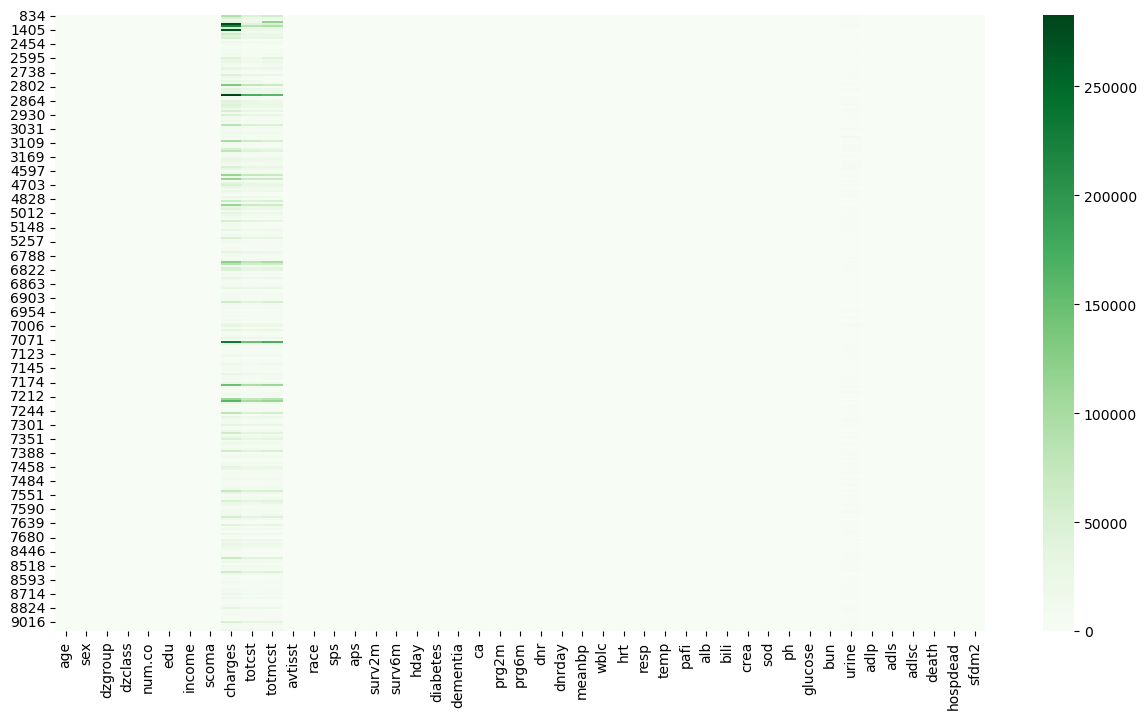

In [15]:
plt.figure(figsize =(15,8))
sns.heatmap(data, cmap='Greens')
plt.show()

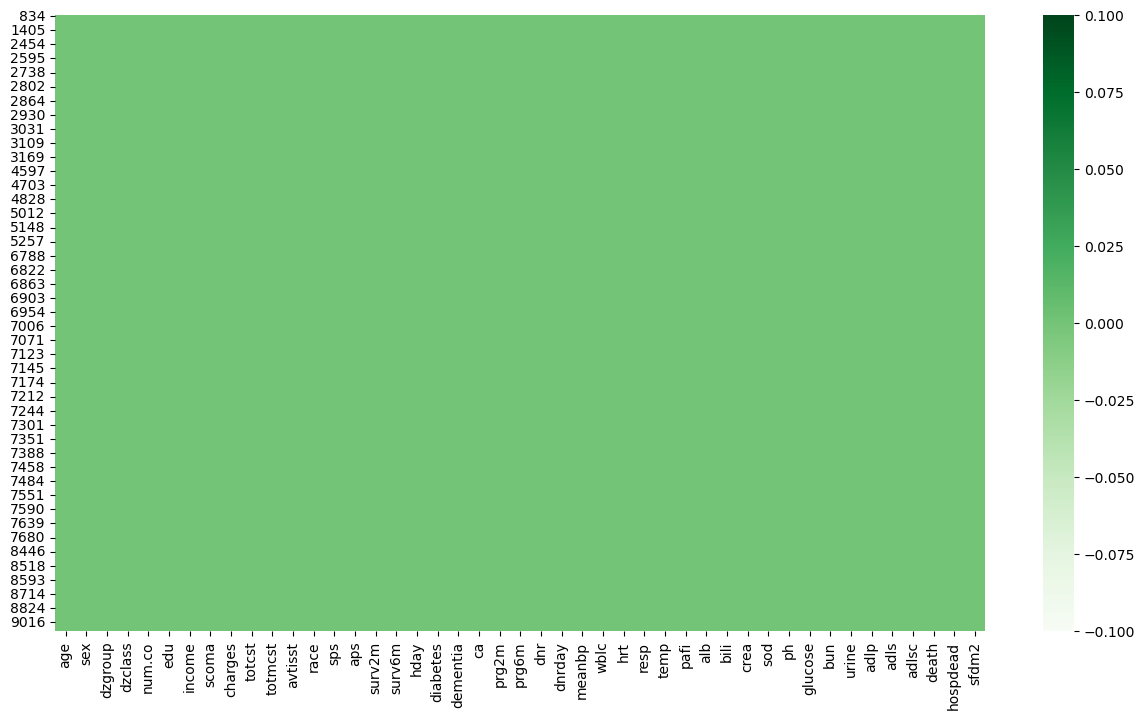

In [16]:
#plt.figure(figsize =(15,15))
plt.figure(figsize =(15,8))
sns.heatmap(data.isnull(), cmap='Greens')
plt.show()

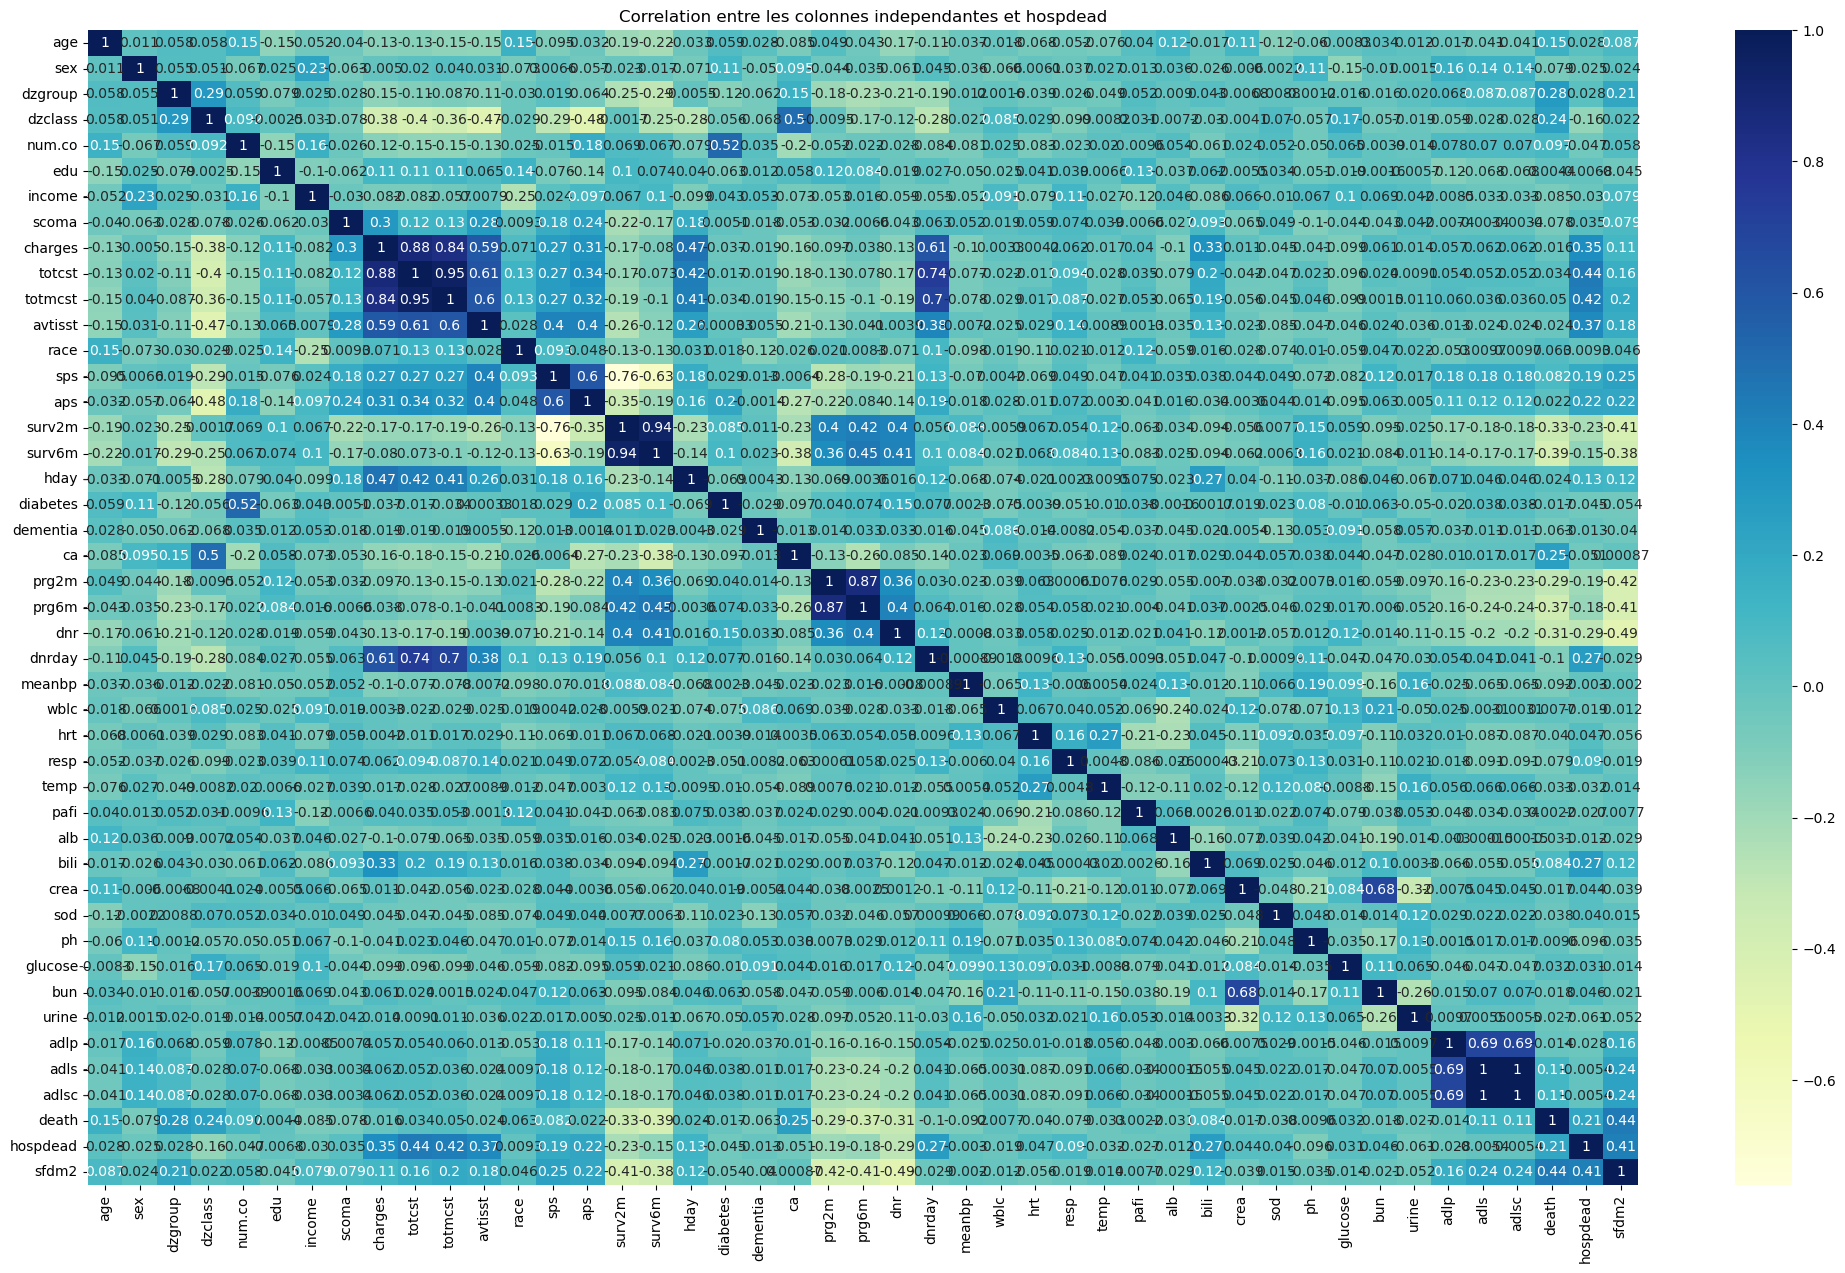

In [17]:
#Correlation
#concat = pd.concat([data,y],axis=1)
corr = data.corr()
plt.figure(figsize =(25,15))
sns.heatmap(corr, cmap='YlGnBu',annot=True)
plt.title("Correlation entre les colonnes independantes et hospdead")
plt.show()

In [10]:
cols = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = cols.corr()
print(corr_matrix)

               age    num.co       edu     scoma   charges    totcst  \
age       1.000000  0.127986 -0.135537  0.006557 -0.167864 -0.155399   
num.co    0.127986  1.000000 -0.109775 -0.126215 -0.108838 -0.147501   
edu      -0.135537 -0.109775  1.000000 -0.000482  0.112803  0.090229   
scoma     0.006557 -0.126215 -0.000482  1.000000  0.137029  0.116443   
charges  -0.167864 -0.108838  0.112803  0.137029  1.000000  0.871896   
totcst   -0.155399 -0.147501  0.090229  0.116443  0.871896  1.000000   
totmcst  -0.134466 -0.144888  0.099033  0.096084  0.814307  0.948995   
avtisst  -0.133693 -0.164272  0.024131  0.313402  0.449707  0.486085   
sps      -0.115444 -0.048492  0.025665  0.278437  0.264415  0.265949   
aps      -0.032576  0.016470  0.001937  0.279056  0.311941  0.306734   
surv2m   -0.158056  0.099580 -0.023780 -0.590313 -0.210029 -0.202173   
surv6m   -0.197112  0.086865 -0.030920 -0.499572 -0.162642 -0.150289   
hday     -0.071923 -0.080627  0.040076  0.116485  0.476965  0.47

#### Diviser dataset en entrainement set et test set

In [18]:
X = data[['age', 'sex', 'race', 'edu', 'income', 'scoma', 'sps', 'aps', 'meanbp',
'hrt', 'resp', 'temp', 'pafi', 'dzgroup', 'dzclass', 'num.co', 'ca',
'avtisst', 'alb', 'bili', 'crea', 'sod', 'ph', 'adls', 'sfdm2', 'surv2m', 'surv6m']]
y = data['hospdead']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(244, 27)
(62, 27)
(244,)
(62,)


In [16]:
print(X_train)

           age  sex  race   edu  income  scoma        sps   aps  meanbp  \
7654  46.53497    1     1  12.0       3    0.0  24.796875  35.0   120.0   
6847  77.85596    1     1   7.0       3    0.0  15.298828  19.0    64.0   
3224  47.45798    0     5  10.0       3    0.0  23.699219  38.0    79.0   
8579  72.91998    0     5  10.0       3    0.0  20.199219  32.0   128.0   
7035  57.53299    1     1  12.0       3    0.0  16.699219  29.0    76.0   
...        ...  ...   ...   ...     ...    ...        ...   ...     ...   
7637  73.91595    1     1  10.0       3    0.0  21.500000  21.0   152.0   
7225  45.42099    0     5  10.0       0    0.0   9.099609  20.0    72.0   
5506  59.04700    1     5   8.0       1    0.0  24.296875  27.0   114.0   
2894  64.77795    1     5  11.0       3    0.0  26.097656  34.0    47.0   
7137  58.30798    0     5  12.0       3    0.0  23.398438  27.0    71.0   

        hrt  ...  avtisst       alb      bili      crea    sod        ph  \
7654  129.0  ...    24.

#### Feature Scalling

In [20]:
#Standarization avec StandardScaler
std = StandardScaler()
x_train = std.fit_transform(X_train)#transform colonnes independantes des donnes d'entrainement en mean=0 and std=1
x_test = std.transform(X_test)

In [21]:
X_test

,age,sex,race,edu,income,scoma,sps,aps,meanbp,hrt,...,avtisst,alb,bili,crea,sod,ph,adls,sfdm2,surv2m,surv6m
8535,43.36200,0,5,16.0,1,9.0,16.898438,26.0,99.0,69.0,...,18.500000,4.500000,0.399963,0.699951,136.0,7.359375,0.0,0,0.901978,0.866943
3134,75.69598,0,5,8.0,3,9.0,27.898438,42.0,103.0,64.0,...,18.750000,3.399902,3.500000,4.099609,153.0,7.469727,0.0,0,0.623901,0.520996
7674,64.68695,0,5,7.0,0,0.0,23.097656,54.0,67.0,112.0,...,21.000000,1.799805,1.299805,1.199951,145.0,7.469727,5.0,0,0.826904,0.716919
7351,31.93199,1,5,11.0,3,0.0,27.000000,42.0,110.0,69.0,...,21.000000,2.899902,0.500000,0.699951,131.0,7.469727,1.0,0,0.617920,0.512939
7047,69.91895,0,5,5.0,0,0.0,18.000000,27.0,106.0,122.0,...,10.500000,2.099609,1.199951,0.899902,137.0,7.479492,0.0,0,0.863892,0.774902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,52.98297,0,5,18.0,2,0.0,17.398438,11.0,132.0,110.0,...,12.000000,3.099609,1.299805,4.000000,128.0,7.319336,0.0,0,0.727905,0.455994
1405,58.98199,0,0,12.0,1,26.0,25.097656,26.0,57.0,105.0,...,28.500000,2.399902,36.398438,5.199219,135.0,7.109375,1.0,0,0.644897,0.544922
2877,64.71198,0,5,25.0,2,0.0,25.296875,35.0,67.0,100.0,...,22.666656,1.899902,4.000000,1.799805,144.0,7.379883,0.0,0,0.788940,0.719971
4662,73.99298,0,5,7.0,3,0.0,26.097656,56.0,63.0,115.0,...,31.333328,2.500000,17.597656,4.799805,140.0,7.379883,0.0,4,0.498962,0.380981


### 4) Prediction des Modeles de Classification

#### 4.1) Modele du Regression Logistique

Rapport du classification est:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.67      0.67      0.67         3

    accuracy                           0.97        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.97      0.97      0.97        62

------------------------------------------------------
accuray score est: 0.967741935483871
------------------------------------------------------
Confusion matrix:
 [[58  1]
 [ 1  2]]


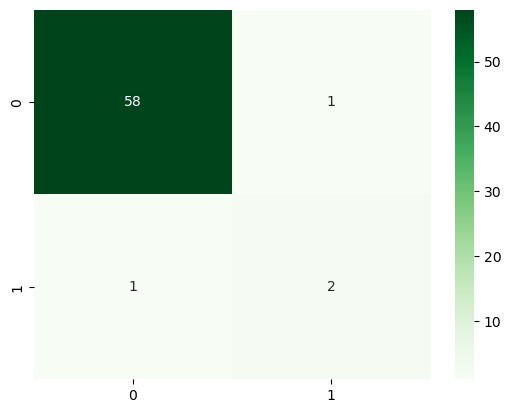

In [22]:
logisticReg_model = LogisticRegression(random_state=0)#Creation de l'instance
logisticReg_model.fit(X_train,y_train)#Entrainement du modele
y_pred_test_LR = logisticReg_model.predict(X_test)#Prediction sur test set

#Rapport du modele Regression Logistique  
print('Rapport du classification est:')
print(classification_report(y_test, y_pred_test_LR))
print('------------------------------------------------------')

#Accurancy score
score_LR = accuracy_score(y_test,y_pred_test_LR)
print("accuray score est:",score_LR)
print('------------------------------------------------------')

#Matrice de confusion
conf = confusion_matrix(y_test,y_pred_test_LR)
sns.heatmap(conf, annot=True, cmap='Greens')
print("Confusion matrix:\n",conf)


<font size="4"><b>Interpretation</b></font>

1.Matrice de confusion:

- 58 fois la prediction etait correcte pour la valeur 0.
- 1 fois la prediction etait 0 mais la valeur reel etait 1.
- 1 fois la valeur reel etait 0 mais la predite etait 1.
- 2 fois la prediction etait correcte pour predire la valeur 1.

2.Accurance:

97% des predictions sont correctes

#### 4.2) Modele du K-Nearest Neighboors

Rapport du classification est:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       0.00      0.00      0.00         3

    accuracy                           0.95        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.91      0.95      0.93        62

------------------------------------------------------
accuray score est: 0.9516129032258065
------------------------------------------------------
Confusion matrix:
 [[58  1]
 [ 1  2]]


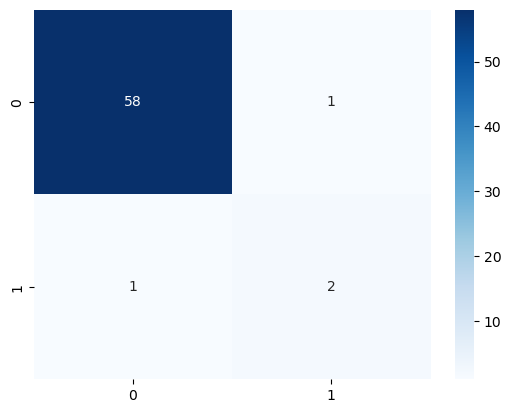

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)#Creation de l'instance
knn_model.fit(X_train,y_train)#Entrainement du modele
y_pred_test_knn = knn_model.predict(X_test.values)#Prediction sur test set

#Rapport du modele KNN
print('Rapport du classification est:')
print(classification_report(y_test, y_pred_test_knn))
print('------------------------------------------------------')

#Accurancy score
score_Knn = accuracy_score(y_test,y_pred_test_knn)
print("accuray score est:",score_Knn)
print('------------------------------------------------------')

#Matrice de confusion
conf = confusion_matrix(y_test,y_pred_test_LR)
sns.heatmap(conf, annot=True, cmap='Blues')
print("Confusion matrix:\n",conf)


<font size="4"><b>Interpretation</b></font>

1.Matrice de confusion:

- 58 fois la prediction etait correcte pour la valeur 0.
- 1 fois la prediction etait 0 mais la valeur reel etait 1.
- 1 fois la valeur reel etait 0 mais la predite etait 1.
- 2 fois la prediction etait correcte pour predire la valeur 1.

2.Accurance:

95% des predictions sont correctes

#### 4.3) Modele du Support Vector Machine(SVM)

Rapport du classification est:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.33      0.67      0.44         3

    accuracy                           0.92        62
   macro avg       0.66      0.80      0.70        62
weighted avg       0.95      0.92      0.93        62

------------------------------------------------------
accuray score est: 0.9193548387096774
------------------------------------------------------
Confusion matrix:
 [[55  4]
 [ 1  2]]


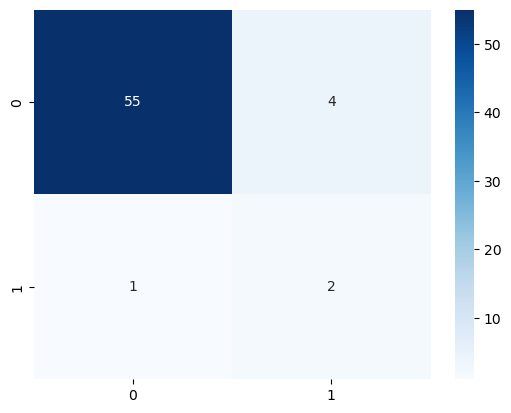

In [26]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,y_train)#Entrainement du modele
y_pred_test_svm = svm_model.predict(X_test)#Prediction
#Rapport du modele SVM
print('Rapport du classification est:')
print(classification_report(y_test, y_pred_test_svm))
print('------------------------------------------------------')

#Accurancy score
score_Svm = accuracy_score(y_test,y_pred_test_svm)
print("accuray score est:",score_Svm)
print('------------------------------------------------------')

#Matrice de confusion
conf = confusion_matrix(y_test,y_pred_test_svm)
sns.heatmap(conf, annot=True, cmap='Blues')
print("Confusion matrix:\n",conf)

<font size="4"><b>Interpretation</b></font>

1.Matrice de confusion:

- 55 fois la prediction etait correcte pour la valeur 0.
- 4 fois la prediction etait 0 mais la valeur reel etait 1.
- 1 fois la valeur reel etait 0 mais la predite etait 1.
- 2 fois la prediction etait correcte pour predire la valeur 1.

2.Accurance:

92% des predictions sont correctes

In [27]:
scores = [score_LR,score_Knn,score_Svm]
models = pd.DataFrame({'Modeles':['Logisique Regression','KNN','SVM'],'Accuracy Score':scores})
models.sort_values(by=['Accuracy Score'], ascending=False)

,Modeles,Accuracy Score
0,Logisique Regression,0.967742
1,KNN,0.951613
2,SVM,0.919355
